In [312]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
from torchtext.datasets import Multi30k, multi30k
from torchtext.data.utils import get_tokenizer
from torchtext. vocab import build_vocab_from_iterator
from typing import Iterable, List

In [313]:
multi30k.URL["train"] = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0205EN-SkillsNetwork/training.tar.gz"
multi30k.URL["valid"] = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0205EN-SkillsNetwork/validation.tar.gz"

In [314]:
src_lan='de'
trgt_lan='en'

token_transforms={}
token_transforms[src_lan]=get_tokenizer('spacy','de_core_news_sm')
token_transforms[trgt_lan]=get_tokenizer('spacy','en_core_web_sm')

In [316]:
train_data= Multi30k(split='train',)
valid_data= Multi30k(split='valid')

In [317]:
token_transforms['en']('i hhhhh u')

['i', 'hhhhh', 'u']

In [320]:
def yield_tokens_en():
    for i in train_data:
        yield token_transforms['en'](i[1])

def yield_tokens_de():
    for i in train_data:
        yield token_transforms['de'](i[0])

In [321]:
unk_idx,pad_idx,sos_idx,eos_idx=0,1,2,3
special_symbols=['<unk>','<pad>','<sos>','<eos>']
vocab_transforms={}

In [322]:
vocab_ger=build_vocab_from_iterator(yield_tokens_de(),specials=special_symbols)
vocab_eng=build_vocab_from_iterator(yield_tokens_en(),specials=special_symbols)
vocab_ger.set_default_index(0)
vocab_eng.set_default_index(0)

/Users/sumanthkumar/Downloads/UB/ML-nn/pt-prac/ttor-prac/lib/python3.8/site-packages/torch/utils/data/datapipes/iter/combining.py:337: UserWarning: Some child DataPipes are not exhausted when __iter__ is called. We are resetting the buffer and each child DataPipe will read from the start again.
  warnings.warn("Some child DataPipes are not exhausted when __iter__ is called. We are resetting "


In [323]:
def collate_fn(batch):
    src=[]
    trg=[]
    offset_src=[0]
    max_len_src=0
    max_len_trg=0
    offset_trg=[0]
    for i in batch:
        src.append(torch.tensor(vocab_ger(['<sos>']+token_transforms['de'](i[0])+['<eos>'])))
        trg.append(torch.tensor(vocab_eng(['<sos>']+token_transforms['en'](i[1])+['<eos>'])))
        if max_len_src<len(src[-1]):
            max_len_src=len(src[-1])
        if max_len_trg<len(trg[-1]):
            max_len_trg=len(trg[-1])
        offset_src.append(len(src[-1]))
        offset_trg.append(len(trg[-1]))
    # add vocab, make it tensor
    src=pad_sequence(src,batch_first=True,padding_value=1)
    trg=pad_sequence(trg,batch_first=True,padding_value=1)
    offset_src=torch.tensor(offset_src).cumsum(0)[:-1]
    offset_trg=torch.tensor(offset_trg).cumsum(0)[:-1]
    return src,trg,torch.tensor(offset_src),torch.tensor(offset_trg)
        

In [324]:
train_loader=DataLoader(train_data,5,collate_fn=collate_fn,drop_last=True)
valid_loader=DataLoader(valid_data,5,collate_fn=collate_fn,drop_last=True)

In [325]:
for i in train_loader:
    print(i)
    break

(tensor([[   2,   21,   85,  257,   31,   87,   22,   94,    7,   16,  112, 7910,
         3209,    4,    3,    1,    1],
        [   2,   84,   31,   10,  847, 2208,   15, 8268,    4,    3,    1,    1,
            1,    1,    1,    1,    1],
        [   2,    5,   69,   27,  219,    7,   15, 6769,   55,  508,    4,    3,
            1,    1,    1,    1,    1],
        [   2,    5,   12,    7,    6,   47,   41,   30,   11,   13,  543,    9,
          698,   15,  248,    4,    3],
        [   2,   21,   31,   53,   56, 1350,    9,  409,  174,   29,    4,    3,
            1,    1,    1,    1,    1]]), tensor([[   2,   19,   25,   15, 1169,  808,   17,   57,   84,  336, 1339,    5,
            3,    1,    1,    1,    1],
        [   2,  165,   36,    7,  335,  287,   17, 1224,    4,  758, 4496, 2957,
            5,    3,    1,    1,    1],
        [   2,    6,   61,   33,  232,   71,    4,  253, 4460,    5,    3,    1,
            1,    1,    1,    1,    1],
        [   2,    6,   12,   

/var/folders/d_/51frpk157tzbgq8_1892j3t40000gn/T/ipykernel_18658/94932476.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return src,trg,torch.tensor(offset_src),torch.tensor(offset_trg)


In [80]:
i[0]

tensor([[   2,   21,   85,  257,   31,   87,   22,   94,    7,   16,  112, 7910,
         3209,    4,    3],
        [   2,   84,   31,   10,  847, 2208,   15, 8268,    4,    3,    1,    1,
            1,    1,    1]])

In [69]:
i[1]

tensor([[   2,   19,   25,   15, 1169,  808,   17,   57,   84,  336, 1339,    5,
            3,    1],
        [   2,  165,   36,    7,  335,  287,   17, 1224,    4,  758, 4496, 2957,
            5,    3]])

In [326]:
for td in train_data:
    print(td)
    break

('Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.', 'Two young, White males are outside near many bushes.')


In [50]:
vocab_eng.get_itos()[1]

'<pad>'

In [327]:
import torch.nn as nn

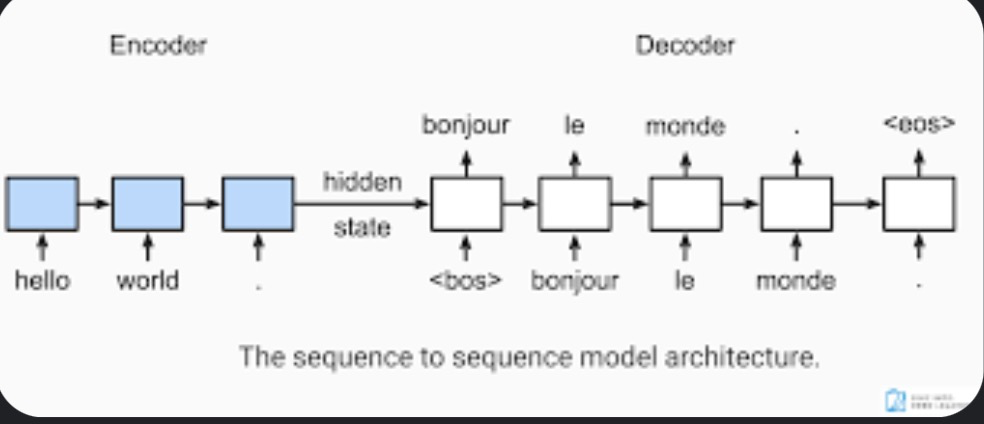

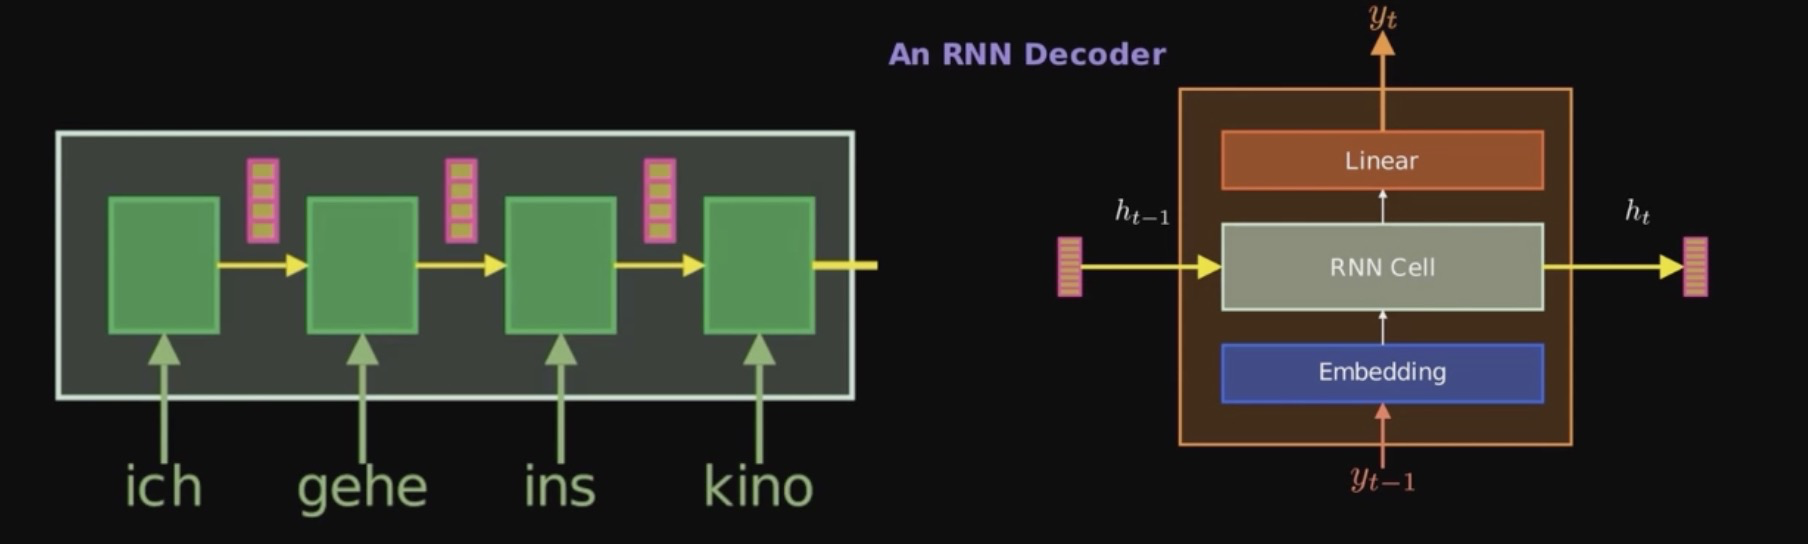

In [328]:
class encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.embeddingLayer=nn.Embedding(num_embeddings=len(vocab_ger.get_itos()),embedding_dim=64)
        self.layer1=nn.RNN(input_size=64,hidden_size=64,num_layers=2)
        self.layer2=nn.Linear(in_features=64,out_features=32)

    def forward(self,input,hidden=torch.zeros((2,5,64))):
        embedded=self.embeddingLayer(input) #outputs batch,seq_len,embedding_dim
        out=self.layer1(embedded.reshape(embedded.shape[1],embedded.shape[0],embedded.shape[2]),hidden) # rnn takes seq_length first, outputs (a,b) b:-hiden state of last token in each input
        encoded_sentences= self.layer2(out[1]) #layer2 taking hidden state of last token from last layer, now this is (batch, out_features):- each sentence's representation by encoder

        return encoded_sentences

        # return embedded

In [330]:
class decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding=nn.Embedding(len(vocab_eng.get_itos()),embedding_dim=128)
        self.layer1=nn.RNN(input_size=128,hidden_size=32,num_layers=2)
        self.layer2=nn.Linear(in_features=32,out_features=len(vocab_eng.get_itos()))

    def forward(self,input,hidden):
        embedded=self.embedding(input)
        # return embedded
        # return self.layer1(embedded.reshape(embedded.shape[1],embedded.shape[0],embedded.shape[2]),hidden)
        out,hid=self.layer1(embedded.reshape(embedded.shape[1],embedded.shape[0],embedded.shape[2]),hidden)
        return self.layer2(out.squeeze()),hid

In [331]:
encoder_model=encoder()
decoder_model=decoder()

# Training loop 

In [332]:
for i in train_data:
    print(i)
    break

('Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.', 'Two young, White males are outside near many bushes.')


In [333]:
for i in train_loader:
    print()

/var/folders/d_/51frpk157tzbgq8_1892j3t40000gn/T/ipykernel_18658/94932476.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return src,trg,torch.tensor(offset_src),torch.tensor(offset_trg)


In [216]:
vocab_eng['<sos>']

0

In [220]:
vocab_eng['<pad>']

1

In [334]:
optimisers1=torch.optim.SGD(encoder_model.parameters())
optimisers2=torch.optim.SGD(decoder_model.parameters())
loss_func=nn.CrossEntropyLoss(ignore_index=vocab_eng['<pad>'])

In [250]:
input.shape

torch.Size([5])

In [248]:
target.shape

torch.Size([5, 17])

## no teacher forcing

In [335]:
import tqdm

In [287]:
source.shape

torch.Size([1, 2])

In [336]:
for epoch in tqdm.tqdm(range(100)):
    for source,target,_,_ in train_loader:
        # outputs should have the shape (batch_size * seq_len, vocab_size).
        outputs=torch.zeros((target.shape[0],target.shape[1],len(vocab_eng.get_stoi())))
        encoded_sentences=encoder_model(source)
        input=torch.tensor([vocab_eng['<sos>']]*target.shape[0])
        hid=encoded_sentences
        for i in range(1,target.shape[1]):
            # print(i)
            output,hid=decoder_model(input.unsqueeze(1),hid)
            # outputs (batch,num_words,vocab)
            outputs[:,i,:]=output
            input=torch.argmax(outputs[:,i,:],dim=-1)
            # encoded_sentences=hid

        loss=loss_func(outputs.reshape(outputs.shape[0]*outputs.shape[1],outputs.shape[2]),target.reshape(-1,1).squeeze())                                    
        optimisers1.zero_grad()
        optimisers2.zero_grad()
        loss.backward()
        optimisers1.step()
        optimisers2.step()

  0%|          | 0/100 [00:00<?, ?it/s]/var/folders/d_/51frpk157tzbgq8_1892j3t40000gn/T/ipykernel_18658/94932476.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return src,trg,torch.tensor(offset_src),torch.tensor(offset_trg)
  3%|▎         | 3/100 [11:41<6:18:01, 233.83s/it]


KeyboardInterrupt: 

## Inference from the model

In [337]:
torch.save(encoder_model.state_dict(), "encoder_model.pth")
torch.save(decoder_model.state_dict(),'decoder_model.pth')

In [338]:
for epoch in tqdm.tqdm(range(100)):
    for source,target,_,_ in train_loader:
        # outputs should have the shape (batch_size * seq_len, vocab_size).
        outputs=torch.zeros((target.shape[0],target.shape[1],len(vocab_eng.get_stoi())))
        encoded_sentences=encoder_model(source)
        input=torch.tensor([vocab_eng['<sos>']]*target.shape[0])
        hid=encoded_sentences
        for i in range(1,target.shape[1]):
            # print(i)
            output,hid=decoder_model(input.unsqueeze(1),hid)
            # outputs (batch,num_words,vocab)
            outputs[:,i,:]=output
            input=torch.argmax(outputs[:,i,:],dim=-1)
        break
    break

  0%|          | 0/100 [00:00<?, ?it/s]/var/folders/d_/51frpk157tzbgq8_1892j3t40000gn/T/ipykernel_18658/94932476.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return src,trg,torch.tensor(offset_src),torch.tensor(offset_trg)
  0%|          | 0/100 [00:00<?, ?it/s]


In [ ]:
for i in train_data

In [339]:
for sentence in source:
    sent=''
    for word in sentence:
        sent+=vocab_ger.get_itos()[word]+' '
    print(sent)

<sos> Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche . <eos> <pad> <pad> 
<sos> Mehrere Männer mit Schutzhelmen bedienen ein Antriebsradsystem . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 
<sos> Ein kleines Mädchen klettert in ein Spielhaus aus Holz . <eos> <pad> <pad> <pad> <pad> <pad> 
<sos> Ein Mann in einem blauen Hemd steht auf einer Leiter und putzt ein Fenster . <eos> 
<sos> Zwei Männer stehen am Herd und bereiten Essen zu . <eos> <pad> <pad> <pad> <pad> <pad> 


In [340]:
for sentence in target:
    sent=''
    for word in sentence:
        sent+=vocab_eng.get_itos()[word]+' '
    print(sent)

<sos> Two young , White males are outside near many bushes . <eos> <pad> <pad> <pad> <pad> 
<sos> Several men in hard hats are operating a giant pulley system . <eos> <pad> <pad> <pad> 
<sos> A little girl climbing into a wooden playhouse . <eos> <pad> <pad> <pad> <pad> <pad> <pad> 
<sos> A man in a blue shirt is standing on a ladder cleaning a window . <eos> 
<sos> Two men are at the stove preparing food . <eos> <pad> <pad> <pad> <pad> <pad> <pad> 


In [341]:
for sent in torch.argmax(outputs,dim=-1):
    sentence=''
    for word in sent:
        sentence+=' '+ vocab_eng.get_itos()[word]
    print(sentence)


 <unk> A man a a a a a a a a a a a a a a
 <unk> A <eos> a a a a a a a a a a a a a a
 <unk> A man a a a a a a a a a a a a a a
 <unk> A man a a a a a a a a a a a a a a
 <unk> A man a a a a a a a a a a a a a a


In [261]:
# let's take a random german sentence and see how is it translated to english by our model 

16

In [306]:
torch.argmax(outputs,dim=-1)

tensor([[ 0,  6, 12,  7,  4,  4,  4,  4,  4,  4,  5,  5,  3,  3,  3,  3,  3],
        [ 0,  6, 12,  7,  4,  4,  4,  4,  4,  4,  5,  5,  3,  3,  3,  3,  3],
        [ 0,  6, 12,  7,  4,  4,  4,  4,  4,  4,  5,  5,  3,  3,  3,  3,  3],
        [ 0,  6, 12,  7,  4,  4,  4,  4,  4,  4,  5,  5,  3,  3,  3,  3,  3],
        [ 0,  6, 12,  7,  4,  4,  4,  4,  4,  4,  5,  5,  3,  3,  3,  3,  3]])

In [ ]:
a=10
for i in train_loader:
    print('i0',i[0].shape)
    print('i1',i[1].shape)
    a=a-1
    if a<=0:
        break

i0 torch.Size([5, 17])
i1 torch.Size([5, 17])
i0 torch.Size([5, 18])
i1 torch.Size([5, 17])
i0 torch.Size([5, 20])
i1 torch.Size([5, 18])
i0 torch.Size([5, 18])
i1 torch.Size([5, 19])
i0 torch.Size([5, 21])
i1 torch.Size([5, 19])
i0 torch.Size([5, 20])
i1 torch.Size([5, 24])
i0 torch.Size([5, 15])
i1 torch.Size([5, 18])
i0 torch.Size([5, 25])
i1 torch.Size([5, 24])
i0 torch.Size([5, 15])
i1 torch.Size([5, 15])
i0 torch.Size([5, 21])
i1 torch.Size([5, 19])


/Users/sumanthkumar/Downloads/UB/ML-nn/pt-prac/ttor-prac/lib/python3.8/site-packages/torch/utils/data/datapipes/iter/combining.py:337: UserWarning: Some child DataPipes are not exhausted when __iter__ is called. We are resetting the buffer and each child DataPipe will read from the start again.
  warnings.warn("Some child DataPipes are not exhausted when __iter__ is called. We are resetting "
/var/folders/d_/51frpk157tzbgq8_1892j3t40000gn/T/ipykernel_18658/2610925094.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return src,trg,torch.tensor(offset_src),torch.tensor(offset_trg)


In [238]:
m1=encoder()
kk=m1(i[0])

In [239]:
m2=decoder()
# m2(kk)

In [156]:
kk.shape

torch.Size([5, 32])

In [240]:
aa=m2(torch.tensor([3]*5).reshape(5,1),kk)

In [241]:
aa.shape

torch.Size([5, 1, 128])

In [198]:
aa.shape

torch.Size([5, 10837])

In [201]:
torch.argmax(aa,dim=1)

tensor([3445, 5807, 9585, 3445, 5807])

In [186]:
aa[0].squeeze().shape

torch.Size([5, 32])

In [177]:
aa[1].shape

torch.Size([2, 5, 32])

In [185]:
aa[1][1]==aa[0][0]

tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, 

In [128]:
kk[1][1].shape

torch.Size([5, 64])

In [91]:
nn.RNN(input_size=128,hidden_size=64,num_layers=1)(torch.arange(0,128*3).reshape(128,3,1)+torch.tensor(1.1))[0].shape

torch.Size([3, 64])

In [92]:
nn.RNN(input_size=128,hidden_size=64,num_layers=1)(torch.arange(0,128*3).reshape(3,128)+torch.tensor(1.1))[1].shape

torch.Size([1, 64])

In [204]:
a=torch.arange(100).reshape(10,10)

In [205]:
a

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [206]:
a[1:]

tensor([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])